Predicting Life Expectancy using Linear Regression

Using Machine Learning and Data Science to predict the remaining life span of a person. According to Our World in Data, "life expectancy is based on an estimate of the average age that members of a particular population group will be when they die." Life expectancy depends on several factors such as birth year, gender, race and ethnicity, and lifestyle choices. In this data analysis, we are going to analyze and explore other hidden factors that other have not look at.

In [ ]:
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score

In [ ]:
# Importing data and viewing the data

life_ex = pd.read_csv("Life Expectancy Data.csv")
life_ex.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
# Rename column to make them look uniform

life_ex.rename(columns = {" BMI " :"BMI", 
                          "Life expectancy ": "Life expectancy",
                          "Adult Mortality":"Adult mortality",
                          "infant deaths":"Infant deaths",
                          "percentage expenditure":"Percentage expenditure",
                          "Hepatitis B":"HepatitisB",
                          "Measles ":"Measles",
                          "under-five deaths ": "Under five deaths",
                          "Total expenditure":"Total expenditure",
                          "Diphtheria ": "Diphtheria",
                          " thinness  1-19 years":"Thinness 1-19 years",
                          " thinness 5-9 years":"Thinness 5-9 years",
                          " HIV/AIDS":"HIV/AIDS",
                          "Income composition of resources":"Income composition of resources"}, 
               inplace = True)

In [ ]:
# Dropping unwanted column

life_ex.drop(['Year', 'Status'], axis=1, inplace=True)

In [ ]:
# Look at the statistics from the data

life_ex.describe()

,Life expectancy,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,HepatitisB,Measles,BMI,Under five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
count,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


Data Cleaning

In [ ]:
# To view null values

life_ex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Life expectancy                  2928 non-null   float64
 2   Adult mortality                  2928 non-null   float64
 3   Infant deaths                    2938 non-null   int64  
 4   Alcohol                          2744 non-null   float64
 5   Percentage expenditure           2938 non-null   float64
 6   HepatitisB                       2385 non-null   float64
 7   Measles                          2938 non-null   int64  
 8   BMI                              2904 non-null   float64
 9   Under five deaths                2938 non-null   int64  
 10  Polio                            2919 non-null   float64
 11  Total expenditure                2712 non-null   float64
 12  Diphtheria          

In [ ]:
# Find how many null values are in each column

life_ex.isnull().sum()

Country                              0
Life expectancy                     10
Adult mortality                     10
Infant deaths                        0
Alcohol                            194
Percentage expenditure               0
HepatitisB                         553
Measles                              0
BMI                                 34
Under five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
Thinness 1-19 years                 34
Thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [ ]:
# Replacing the null value with median in case of outliers

life_ex = life_ex.fillna(life_ex.median())
life_ex

<ipython-input-9-7a6393251585>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  life_ex = life_ex.fillna(life_ex.median())


,Country,Life expectancy,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,HepatitisB,Measles,BMI,Under five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


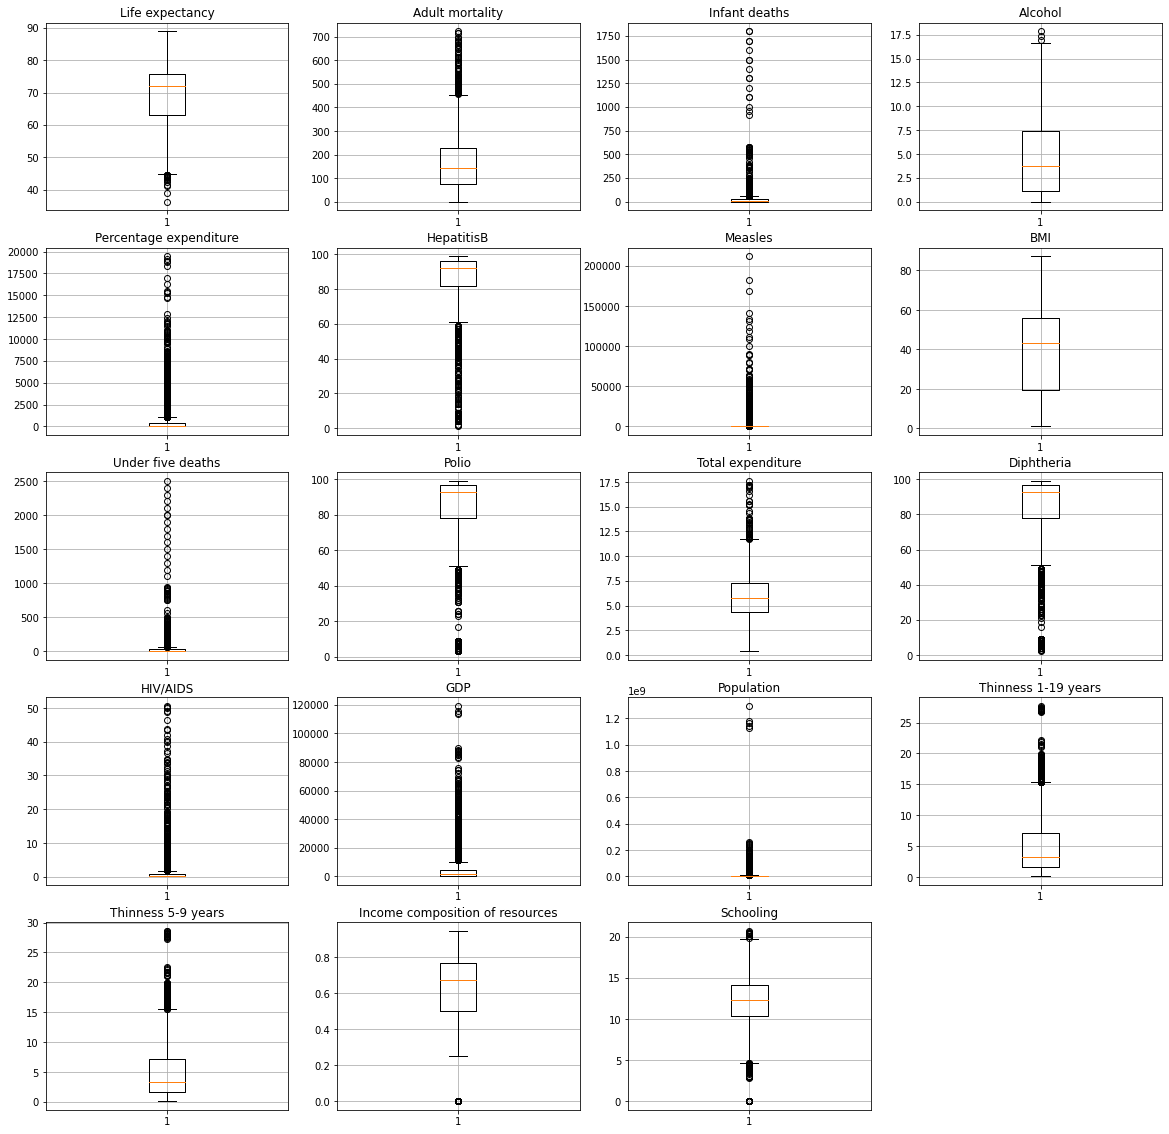

In [ ]:
# Visualizing the data in box plot to see outliers

col_dict = {'Life expectancy':1, 'Adult mortality':2, 'Infant deaths':3, 'Alcohol':4, 
            'Percentage expenditure':5, 'HepatitisB':6, 'Measles':7, 'BMI':8,
            'Under five deaths':9, 'Polio':10, 'Total expenditure':11, 'Diphtheria':12,
            'HIV/AIDS':13, 'GDP':14, 'Population':15, 'Thinness 1-19 years':16, 
            'Thinness 5-9 years':17, 'Income composition of resources':18, 'Schooling':19}

fig = plt.figure(figsize = (20,20))

for variable, i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(life_ex[variable])
                     plt.title(variable)
                     plt.grid(True)
    
plt.show()

Data Visualization and Analysis

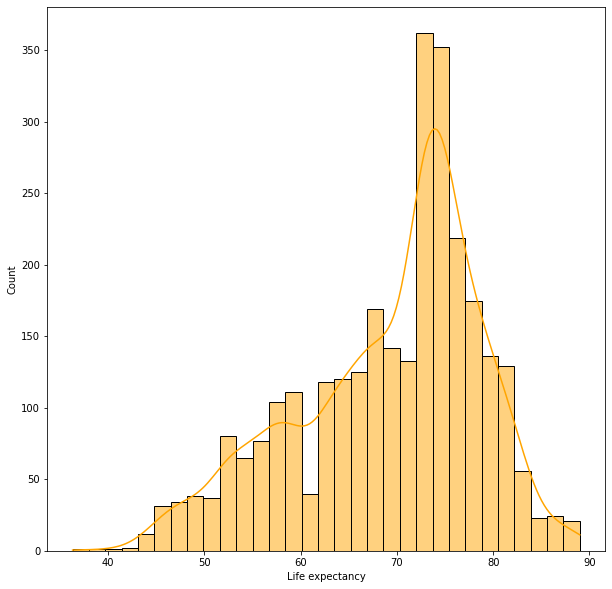

In [ ]:
# Display the distribution of life expectancy after 

plt.figure(figsize = (10,10))
sns.histplot(life_ex['Life expectancy'], kde = True, color = 'orange')

Histogram Analysis

1.  The average life expectancy is between mid 40s to late 80s
2.  The average life span is 70 years old





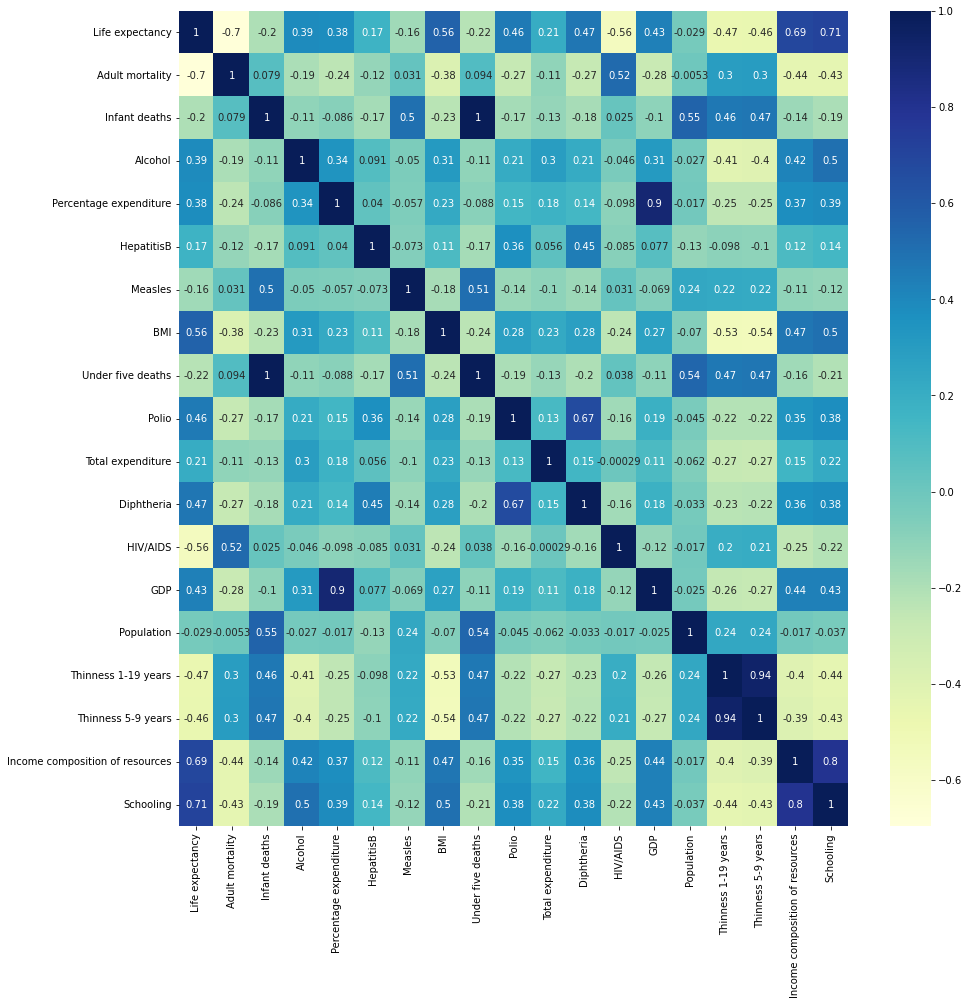

In [ ]:
# Using heatmap to see correlation between different variables

plt.figure(figsize = (15,15))
sns.heatmap(life_ex.corr(), annot = True, cmap = 'YlGnBu')

Heatmap Analysis


1. BMI has a positive correlation with Life expectancy
2. Schooling has a high positive correlation with Life expectancy
3. Adult mortality and Life expectancy have high negative correlation



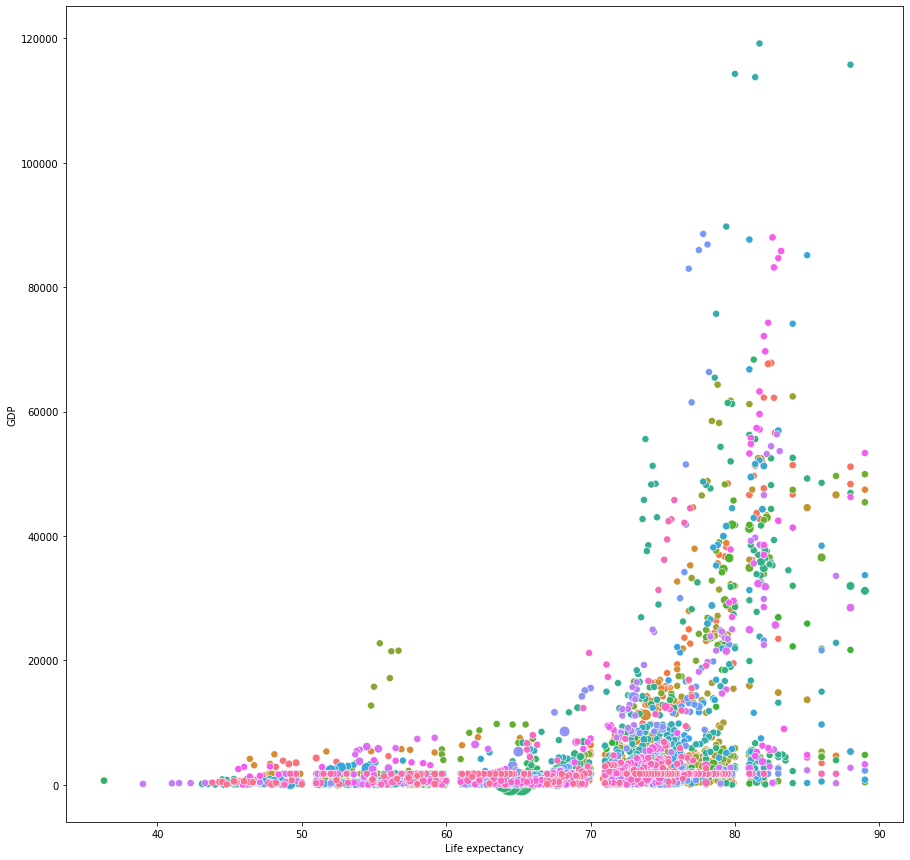

In [ ]:
plt.figure(figsize= (15,15))

sns.scatterplot(data = life_ex,
                x = 'Life expectancy', 
                y = 'GDP',
                size = 'Population',
                hue = 'Country',
                legend = False,
                sizes = (50,600)
               )

plt.show()

Train Test Split

In [ ]:
# Combined the country by their average

life_ex = life_ex.groupby('Country').mean()

In [ ]:
# Splitting data into independent and dependent variables

X = life_ex.drop(['Life expectancy'], axis = 1)
y = life_ex['Life expectancy']

In [ ]:
# Splitting into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(f'The training dataset has {len(X_train)} records.')
print(f'The testing dataset has {len(X_test)} records.')

The training dataset has 135 records.
The testing dataset has 58 records.


In [ ]:
X_train

,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,HepatitisB,Measles,BMI,Under five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,
Bangladesh,141.3750,153.6250,0.244062,32.320972,80.3125,4649.9375,12.87500,201.5625,87.5000,3.035938,92.7500,0.10000,443.561481,4.298516e+07,13.77500,14.33125,0.517875,8.69375
Cuba,57.5625,1.0000,4.163437,364.563858,96.2500,0.0000,49.46250,1.0000,98.6875,6.386563,93.9375,0.10000,3180.434884,1.386542e+06,3.44375,3.26875,0.742125,14.69375
Tajikistan,177.5625,10.6875,0.544687,17.277192,85.3750,208.1875,33.11250,12.7500,88.3125,5.654687,89.2500,0.25625,335.841725,4.751355e+06,3.80625,3.85000,0.583812,10.68125
Yemen,211.8125,39.3750,0.279062,0.000000,55.6875,2761.1875,33.48750,51.6250,67.1250,5.052188,72.6250,0.10000,1766.947595,1.386542e+06,13.83125,13.75000,0.475500,8.50625
Uruguay,119.9375,0.5625,6.021562,621.838919,94.3125,0.0000,52.92500,0.7500,94.2500,8.562812,89.1250,0.10000,7192.584875,2.396771e+06,1.60000,1.54375,0.765625,15.23125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Mauritania,159.9375,7.8125,0.247188,31.703147,68.3750,815.9375,22.47500,11.9375,63.0625,4.049062,60.1250,1.18750,635.049609,1.262286e+06,6.48125,6.81875,0.473062,7.31875
Belarus,218.7500,0.5625,12.888438,329.046455,88.9375,24.8125,54.74375,0.8750,89.8750,6.164688,92.1875,0.10000,3811.525348,6.371867e+06,2.21250,2.33750,0.743250,14.75000
Latvia,161.8125,0.0000,8.544688,530.605192,88.9375,3.3125,51.30625,0.0000,95.0625,6.295312,95.0000,0.10000,7951.824897,1.174563e+06,2.40625,2.43125,0.792500,15.56875


In [ ]:
y_train

Country
Bangladesh    69.30000
Cuba          77.97500
Tajikistan    66.65625
Yemen         63.86250
Uruguay       76.07500
                ...   
Mauritania    62.80000
Belarus       69.90625
Latvia        73.73125
Uganda        55.70625
Maldives      75.53750
Name: Life expectancy, Length: 135, dtype: float64

Linear Regression Model

In [ ]:
# Create linear regression object
lr = LinearRegression()

# Training the model using the training set
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions using the testing set with linear regression
y_prediction = lr.predict(X_test)
y_prediction

array([70.33499516, 75.84557472, 66.57942821, 71.75509984, 73.39685514,
       53.49243527, 82.0712697 , 58.47294202, 71.55950537, 74.03883429,
       73.62590126, 74.94616877, 79.71593671, 66.12682029, 75.97418882,
       84.80697058, 71.05813003, 56.03347426, 67.49494278, 70.13798725,
       55.06911544, 80.76405429, 66.35886766, 81.90047527, 66.41431767,
       65.72152403, 74.57341081, 50.54134686, 84.22829834, 73.26394908,
       60.50434088, 68.07575673, 69.68226865, 70.33574156, 64.09448164,
       77.69369336, 79.84701029, 71.17281045, 83.36945797, 81.14066624,
       70.67297813, 67.21920739, 73.36348716, 75.36394848, 79.8058303 ,
       61.02274752, 73.17714107, 54.94095376, 82.03850905, 75.35797702,
       57.62343121, 56.93179654, 73.72293971, 73.38983908, 58.41824508,
       71.60369371, 51.05193101, 68.74928641])

In [ ]:
# Getting the R_square score from the test 

print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.937445394624409
0.8971013958761088


In [ ]:
# Check for error

sq_test = r2_score(y_test, y_prediction)
mse = mean_squared_error(y_test, y_prediction)
mae = mean_absolute_error(y_test, y_prediction)

print('R_square score of Testing Data: %.2f' %sq_test)
print('Mean Squared Error: %.2f' %mse)
print('Mean Absolute Error: %.2f' %mae)

R_square score of Testing Data: 0.90
Mean Squared Error: 8.86
Mean Absolute Error: 2.19


In [ ]:
# Confidence score over test data

lr_confi = lr.score(X_test, y_test)
print('LR confidence %: ', lr_confi * 100)

In [ ]:
y_test

Country
Democratic People's Republic of Korea    69.19375
Republic of Korea                        80.48750
India                                    65.41875
Saint Vincent and the Grenadines         73.47500
Morocco                                  72.15625
Sierra Leone                             46.11250
Belgium                                  80.68125
Bhutan                                   66.16250
Belize                                   69.26875
Azerbaijan                               70.73125
Iran (Islamic Republic of)               73.85625
Montenegro                               74.50000
Greece                                   81.21875
Ghana                                    60.86250
Slovakia                                 74.75000
Canada                                   81.68750
San Marino                               72.10000
Guinea                                   56.01250
Mongolia                                 65.88750
Guatemala                                7

Random Forest Regressor Model

In [ ]:
# Creating random forest regressor object
rf = RandomForestRegressor(random_state=0)

# Training the model using the training set
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

print('R_square score on Training Data: %.2f' %rf.score(X_test, y_test))

R_square score on Training Data: 0.93


In [ ]:
# Make predictions using the testing set with random forest regressor

rf.predict(X_test)

array([73.023125 , 76.583875 , 69.3944375, 73.22475  , 73.368125 ,
       54.9718125, 81.01175  , 63.4311875, 72.828375 , 73.2515625,
       73.7516875, 74.9740625, 78.90225  , 59.5613125, 74.0423125,
       81.1819375, 71.717875 , 56.3916875, 67.8900625, 72.1325625,
       53.4350625, 79.666875 , 67.65275  , 80.4073125, 69.1194375,
       65.994125 , 73.9628125, 55.267375 , 79.8195625, 73.4590625,
       56.007875 , 70.624375 , 68.86225  , 69.0340625, 65.6404375,
       77.1404375, 78.188125 , 73.435375 , 81.4409375, 81.705125 ,
       72.0066875, 68.161625 , 73.5700625, 75.2215625, 79.47     ,
       55.3989375, 72.5446875, 59.5445625, 81.1939375, 75.3820625,
       55.9664375, 57.1535625, 70.67625  , 73.379    , 55.63275  ,
       71.8213125, 54.0535625, 68.3271875])

In [ ]:
# Check for error

sq_test = r2_score(y_test, rf.predict(X_test))
mse = mean_squared_error(y_test, rf.predict(X_test))
mae = mean_absolute_error(y_test, rf.predict(X_test))
print('R_square score of Testing Data: %.2f' %sq_test)
print('Mean Squared Error: %.2f' %mse)
print('Mean Absolute Error: %.2f' %mae)

R_square score of Testing Data: 0.93
Mean Squared Error: 5.71
Mean Absolute Error: 1.72


In [ ]:
X_test.sort_values(by = ['Schooling', 'BMI'], ascending = [False, False])

,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,HepatitisB,Measles,BMI,Under five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,
Iceland,49.3750,0.0000,7.234063,4991.595308,92.0000,0.0000,51.07500,0.0000,89.7500,8.371562,89.7500,0.10000,30159.502907,1.861776e+05,0.95625,0.90000,0.885313,18.15625
Belgium,70.1875,0.2500,10.587188,2392.432657,74.5000,81.5625,50.89375,1.0000,97.7500,5.949063,97.3125,0.10000,16915.306000,2.884043e+06,0.86250,0.85625,0.877750,16.78750
Argentina,106.0000,10.1250,7.703437,773.038981,82.6250,2.0000,54.98125,11.3750,93.3750,6.840313,92.3750,0.10000,6998.575103,2.012120e+07,1.07500,0.95000,0.794125,16.50625
Slovenia,76.4375,0.0000,10.317187,1556.334545,92.0000,6.0625,52.20000,0.0000,95.1875,8.661563,95.0000,0.10000,11441.044378,4.012791e+05,1.76875,1.79375,0.860437,16.47500
Greece,73.6250,0.1875,8.487813,1759.246820,88.9375,24.8750,58.68125,0.4375,91.4375,8.833438,96.6250,0.10000,16454.235870,1.550208e+06,0.81250,0.73125,0.842313,15.93750
Estonia,169.6875,0.0000,8.685937,859.575008,88.1250,3.5000,56.68125,0.0000,94.2500,5.691562,94.1250,0.10000,8340.432949,7.918487e+05,2.07500,2.13750,0.823313,15.93750
Portugal,58.8750,0.1875,11.682813,1614.897046,87.6250,7.2500,43.63125,0.3750,96.5000,7.815313,97.0000,0.10000,11598.625531,1.032225e+06,0.71875,0.53750,0.805000,15.93750
Italy,54.1875,2.0000,7.984687,2937.137654,95.5000,1961.3750,56.15000,2.3125,96.1250,8.588437,94.7500,0.10000,21234.782371,2.764379e+07,0.51250,0.52500,0.858062,15.93125
France,73.1250,2.9375,11.864062,3751.506574,51.2500,2661.6250,51.98125,3.4375,98.2500,6.505937,98.0625,0.10000,26465.551381,2.758173e+07,0.62500,0.60000,0.870563,15.90000
